In [326]:
from mayavi import mlab
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
from PIL import Image
import os
import cv2
import zipfile
from sklearn.decomposition import PCA
sy.init_printing()
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
mlab.init_notebook(backend='x3d')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


Notebook initialized with x3d backend.


---
<br><h3>Sum, Sub Matrix</h3>

In [197]:
def Matrix_Sympi_To_Numpy(Matrix):
    return np.array(Matrix).astype(np.float64)

def Matrix_Numpy_To_Sympi(Matrix):
    return sy.Matrix(Matrix)

In [198]:
A = sy.Matrix([[1, 2, 3], [4, 5, 6]]); A
B = sy.Matrix([[4, 5, 6], [1, 2, 3]]); B

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

⎡4  5  6⎤
⎢       ⎥
⎣1  2  3⎦

In [199]:
A_Add_B = A+B; A_Add_B

⎡5  7  9⎤
⎢       ⎥
⎣5  7  9⎦

In [200]:
A_Sub_B = A-B; A_Sub_B

⎡-3  -3  -3⎤
⎢          ⎥
⎣3   3   3 ⎦

---
<br><h3>Multiplication Matrix</h3>

In [201]:
A = sy.Matrix([[1, 2], [3, 4]]);
B = sy.Matrix([[5, 6], [7, 8]]);
AB = A*B; AB
AB = A@B; AB

⎡19  22⎤
⎢      ⎥
⎣43  50⎦

⎡19  22⎤
⎢      ⎥
⎣43  50⎦

---
<br><h3>Transpose Matrix</h3>

In [202]:
A.transpose()
A.T

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

---
<br><h3>Random Matrix</h3>

In [203]:
A = sy.randMatrix(3, 3, 0, 10, percent = 80); A

⎡2  4  9⎤
⎢       ⎥
⎢5  0  3⎥
⎢       ⎥
⎣9  3  0⎦

---
<br><h3>Identity Matrix</h3>

In [204]:
e = sy.eye(3); e
e2 = np.eye(3); e2

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

---
<br><h3>Inverse Matrix</h3>

<h5>Method 1:</h5>

In [205]:
A2=sy.Matrix([[1, 2], [2, 3]])
Inv = A2.inv(); Inv
Inv = np.linalg.inv(Matrix_Sympi_To_Numpy(A2)); Inv

⎡-3  2 ⎤
⎢      ⎥
⎣2   -1⎦

array([[-3.,  2.],
       [ 2., -1.]])

<h5>Method 2 (Guess-Jordan):</h5>

In [206]:
AI = A.row_join(e); AI

⎡2  4  9  1  0  0⎤
⎢                ⎥
⎢5  0  3  0  1  0⎥
⎢                ⎥
⎣9  3  0  0  0  1⎦

In [207]:
AI_rref = AI.rref(); AI_rref

⎛⎡1  0  0  -1/25  3/25   4/75 ⎤           ⎞
⎜⎢                            ⎥           ⎟
⎜⎢                        13  ⎥           ⎟
⎜⎢0  1  0  3/25   -9/25   ──  ⎥, (0, 1, 2)⎟
⎜⎢                        75  ⎥           ⎟
⎜⎢                            ⎥           ⎟
⎝⎣0  0  1  1/15   2/15   -4/45⎦           ⎠

---
<br><h3>Is Exist Inverse Matrix</h3>

In [208]:
Det = A.det(); Det

a = np.array([[1, 2], [3, 4]])
np.linalg.det(a)

---
<br><h3>Matrix Rank</h3>

In [209]:
A.rank()
np.linalg.matrix_rank(Matrix_Sympi_To_Numpy(A))

3

---
<br><h3>Solve System $ An*x^n+...+ A2*x+A1=0 $</h3>

In [210]:
lamb = sy.symbols('lamda')
sy.solvers.solve(-2*lamb+1, lamb)

In [211]:
sy.solvers.solve(lamb*lamb+4*lamb+1, lamb)

In [212]:
coeff = [1, 4, 1]
np.roots(coeff)

array([-3.732, -0.268])

---
<br><h3>LDU Decomposition</h3>

In [213]:
PLU_A = sy.Matrix([[1, 3, 2], [-2, -6, 1], [2, 5, 7]]); PLU_A
PLU_A.LUdecomposition()

⎡1   3   2⎤
⎢         ⎥
⎢-2  -6  1⎥
⎢         ⎥
⎣2   5   7⎦

⎛⎡1   0  0⎤  ⎡1  3   2⎤          ⎞
⎜⎢        ⎥  ⎢        ⎥          ⎟
⎜⎢2   1  0⎥, ⎢0  -1  3⎥, [[1, 2]]⎟
⎜⎢        ⎥  ⎢        ⎥          ⎟
⎝⎣-2  0  1⎦  ⎣0  0   5⎦          ⎠

In [214]:
PLU2_A = sy.Matrix([[1, 2, 1], [1, 2, 2], [2, 4, 1], [3, 2, 1]]); PLU2_A
PLU2_A.LUdecomposition()

⎡1  2  1⎤
⎢       ⎥
⎢1  2  2⎥
⎢       ⎥
⎢2  4  1⎥
⎢       ⎥
⎣3  2  1⎦

⎛⎡1  0  0   0⎤  ⎡1  2   1 ⎤          ⎞
⎜⎢           ⎥  ⎢         ⎥          ⎟
⎜⎢3  1  0   0⎥  ⎢0  -4  -2⎥          ⎟
⎜⎢           ⎥, ⎢         ⎥, [[1, 3]]⎟
⎜⎢2  0  1   0⎥  ⎢0  0   -1⎥          ⎟
⎜⎢           ⎥  ⎢         ⎥          ⎟
⎝⎣1  0  -1  1⎦  ⎣0  0   0 ⎦          ⎠

In [215]:
PLU_Symmetric = sy.Matrix([[2, 1, 0], [1, 2, 1], [0, 1, 2]]); PLU_Symmetric
PLU_Symmetric.LUdecomposition()

⎡2  1  0⎤
⎢       ⎥
⎢1  2  1⎥
⎢       ⎥
⎣0  1  2⎦

⎛⎡ 1    0   0⎤  ⎡2   1    0 ⎤    ⎞
⎜⎢           ⎥  ⎢           ⎥    ⎟
⎜⎢1/2   1   0⎥, ⎢0  3/2   1 ⎥, []⎟
⎜⎢           ⎥  ⎢           ⎥    ⎟
⎝⎣ 0   2/3  1⎦  ⎣0   0   4/3⎦    ⎠

In [216]:
PLU_DependentCols = sy.Matrix([[1, 0], [1, 0]]); PLU_DependentCols
PLU_DependentCols.LUdecomposition()

⎡1  0⎤
⎢    ⎥
⎣1  0⎦

⎛⎡1  0⎤  ⎡1  0⎤    ⎞
⎜⎢    ⎥, ⎢    ⎥, []⎟
⎝⎣1  1⎦  ⎣0  0⎦    ⎠

---
<br><h3>LU Solve: Ax=b => x=?</h3>

In [217]:
A = sy.Matrix([ [2, 3, 5], [3, 6, 2], [8, 3, 6] ]); A
b = sy.Matrix(3,1,[52, 61, 75]); b;
A.LUsolve(b)

⎡2  3  5⎤
⎢       ⎥
⎢3  6  2⎥
⎢       ⎥
⎣8  3  6⎦

⎡52⎤
⎢  ⎥
⎢61⎥
⎢  ⎥
⎣75⎦

⎡3⎤
⎢ ⎥
⎢7⎥
⎢ ⎥
⎣5⎦

---
<br><h3>gauss jordan Solve: Ax=b => x=?</h3>

In [218]:
A.gauss_jordan_solve(b)

⎛⎡3⎤    ⎞
⎜⎢ ⎥    ⎟
⎜⎢7⎥, []⎟
⎜⎢ ⎥    ⎟
⎝⎣5⎦    ⎠

---
<br><h3>Vectors</h3>

In [219]:
b.norm()

C:\Users\Saeed\AppData\Local\Temp\ipykernel_10148\3356677013.py:15: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major')


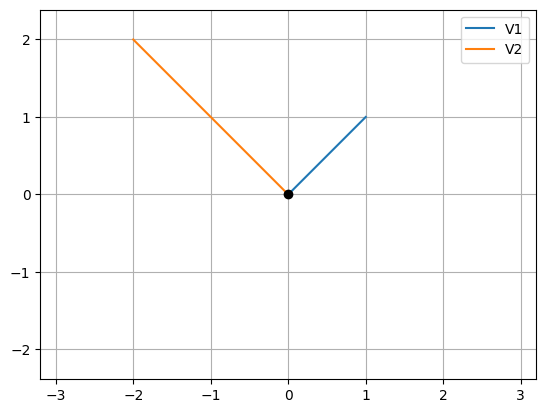

In [220]:
def Draw2DVectors(VectorsArray):
    rows,cols = M.T.shape
    maxes = 1.1*np.amax(abs(M), axis = 0)

    for i,l in enumerate(range(0,cols)):
        xs = [0,M[i,0]]
        ys = [0,M[i,1]]
        plt.plot(xs,ys)

    plt.plot(0,0,'ok')
    plt.axis('equal')
    plt.xlim([-maxes[0] - 1,maxes[0] + 1])
    plt.ylim([-maxes[1] - 1,maxes[1] + 1])
    plt.legend(['V'+str(i+1) for i in range(cols)])
    plt.grid(b=True, which='major')
    plt.show()

M = np.array([[1,1], [-2, 2]])
Draw2DVectors(M)

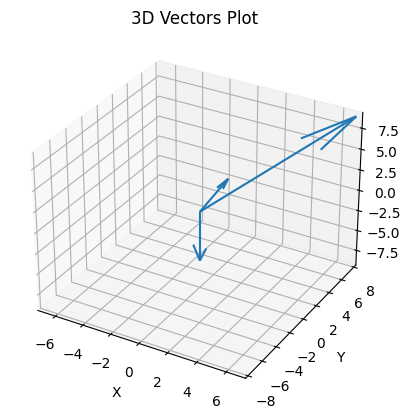

In [221]:
def Draw3DVectors(Vectors):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.set_xlim([-np.max(vectors[:,0]), np.max(vectors[:,0])])
    ax.set_ylim([-np.max(vectors[:,1]), np.max(vectors[:,1])])
    ax.set_zlim([-np.max(vectors[:,2]), np.max(vectors[:,2])])

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    for v in Vectors:
        ax.quiver(0, 0, 0, v[0], v[1], v[2], length=np.linalg.norm(v), normalize=True)


    plt.title('3D Vectors Plot')
    plt.show()

vectors = np.array([[1, 2, 3], [0, 0, -6], [7, 8, 9]])
Draw3DVectors(vectors)

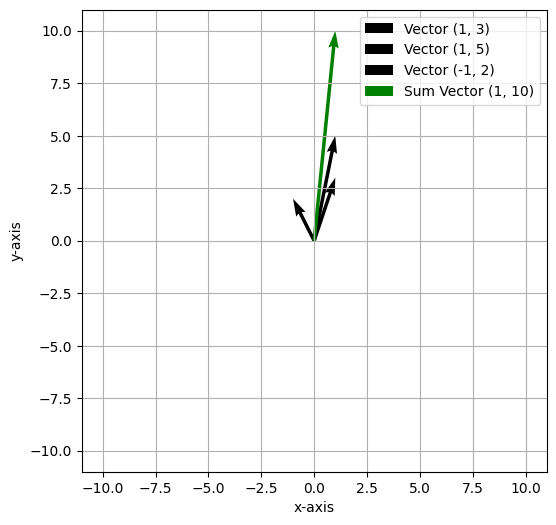

In [222]:
def plot_vector_addition(*Vectors):
  sum_vec = np.sum(Vectors, axis=0)
  fig, ax = plt.subplots(figsize=(6, 6))

  for v in Vectors:
      ax.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, label=f'Vector ({v[0]}, {v[1]})')

  ax.quiver(0, 0, sum_vec[0], sum_vec[1], angles='xy', scale_units='xy', scale=1, color='g', label=f'Sum Vector ({sum_vec[0]}, {sum_vec[1]})')

  ax.set_xlim([-max(map(abs, sum_vec))-1, max(map(abs, sum_vec))+1])
  ax.set_ylim([-max(map(abs, sum_vec))-1, max(map(abs, sum_vec))+1])

  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.legend(loc='upper right')

  plt.grid()
  plt.show()

v1 = [1, 3]
v2 = [1, 5]
v3 = [-1, 2]
plot_vector_addition(v1, v2, v3)

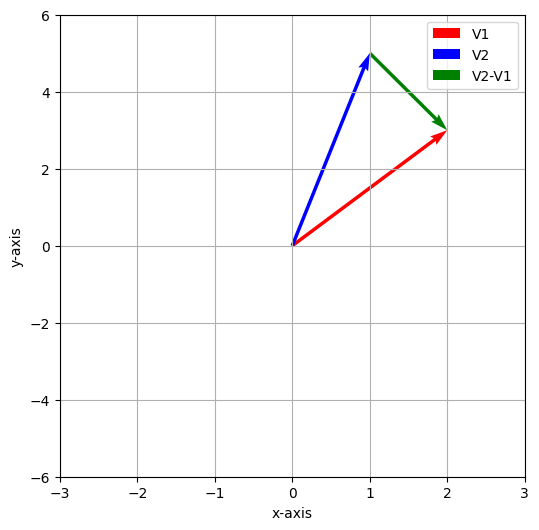

In [223]:
def plot_vector_subtraction(v1, v2):
  sub_vec = np.subtract(v1, v2)
  fig, ax = plt.subplots(figsize=(6, 6))

  ax.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='r', label='V1')
  ax.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='b', label='V2')
  ax.quiver(v2[0], v2[1], sub_vec[0], sub_vec[1], angles='xy', scale_units='xy', scale=1, color='g', label='V2-V1')

  ax.set_xlim([-max(abs(v1[0]), abs(v2[0]), abs(sub_vec[0]))-1, max(abs(v1[0]), abs(v2[0]), abs(sub_vec[0]))+1])
  ax.set_ylim([-max(abs(v1[1]), abs(v2[1]), abs(sub_vec[1]))-1, max(abs(v1[1]), abs(v2[1]), abs(sub_vec[1]))+1])

  plt.xlabel("x-axis")
  plt.ylabel("y-axis")
  plt.legend(loc='upper right')

  plt.grid()
  plt.show()

v1 = [2, 3]
v2 = [1, 5]
plot_vector_subtraction(v1, v2)

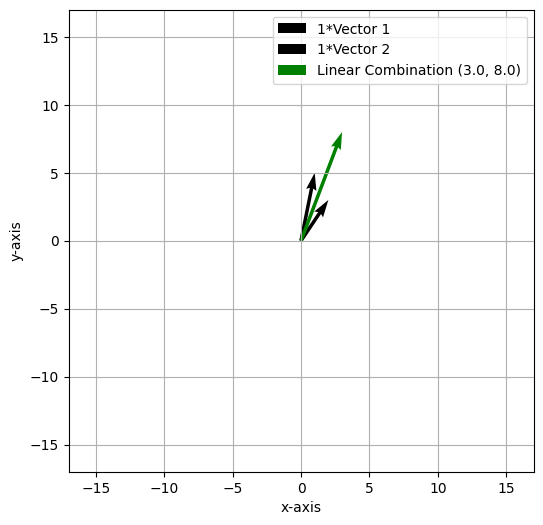

In [224]:
def plot_linear_combination(*vectors, coefficients=None):
    if coefficients is None:
        coefficients = [1] * len(vectors)

    lc = np.zeros(2)
    for i, v in enumerate(vectors):
        lc = np.add(lc, np.multiply(v, coefficients[i]))

    fig, ax = plt.subplots(figsize=(6, 6))

    for i, v in enumerate(vectors):
        ax.quiver(0, 0, coefficients[i]*v[0], coefficients[i]*v[1], angles='xy', scale_units='xy', scale=1, label=f'{coefficients[i]}*Vector {i+1}')

    ax.quiver(0, 0, lc[0], lc[1], angles='xy', scale_units='xy', scale=1, color='g', label=f'Linear Combination ({lc[0]}, {lc[1]})')

    ax.set_xlim([-max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))-1, max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))+1])
    ax.set_ylim([-max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))-1, max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))+1])

    plt.xlabel("x-axis")
    plt.ylabel("y-axis")
    plt.legend(loc='upper right')

    plt.grid()
    plt.show()

v1 = [2, 3]
v2 = [1, 5]
c1 = 1
c2 = 1
plot_linear_combination(v1, v2, coefficients=[c1, c2])

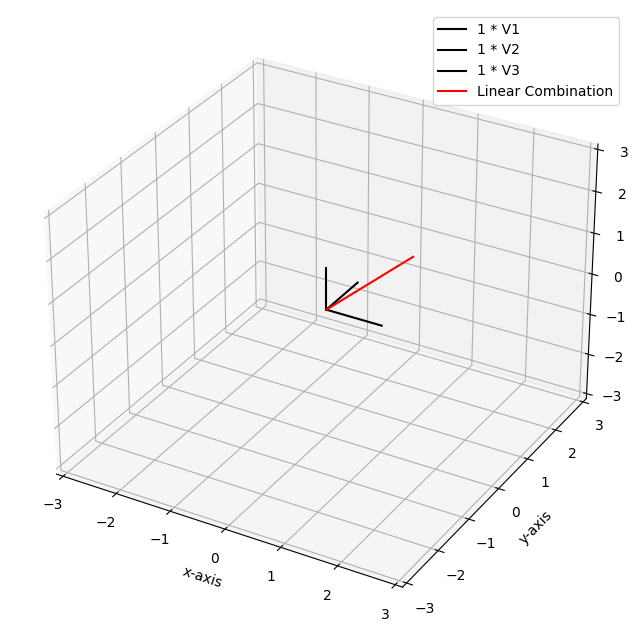

In [225]:
def plot_3d_linear_combination(*vectors, coefficients=None):
    if len(vectors) != 3:
        print("Vectors length must be 3")
        return
    if coefficients is None:
        coefficients = [1] * len(vectors)

    lc = np.zeros(3)
    for i, v in enumerate(vectors):
        lc = np.add(lc, np.multiply(v, coefficients[i]))

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i, v in enumerate(vectors):
        ax.plot([0, v[0]], [0, v[1]], [0, v[2]], 'black', label=f'{coefficients[i]} * V{i+1}')

    ax.plot([0, lc[0]], [0, lc[1]], [0, lc[2]], 'red', label=f'Linear Combination')

    ax.set_xlim([-max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))-1, max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))+1])
    ax.set_ylim([-max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))-1, max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))+1])
    ax.set_zlim([-max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))-1, max(map(abs, lc+np.sum(np.multiply(vectors, coefficients), axis=0)))+1])

    ax.set_xlabel('x-axis')
    ax.set_ylabel('y-axis')
    ax.set_zlabel('z-axis')
    ax.legend(loc='upper right')

    plt.show()

v1 = [1, 0, 0]
v2 = [0, 1, 0]
v3 = [0, 0, 1]
c1 = 1
c2 = 1
c3 = 1
plot_3d_linear_combination(v1, v2, v3, coefficients=[c1, c2, c3])

---
<br><h3>Vector Spaces</h3>

In [226]:
M = sy.Matrix(3, 3, [1, 3, 0, -2, -6, 0, 3, 9, 6]); M
M_A = M.row_join(sy.eye(3))

⎡1   3   0⎤
⎢         ⎥
⎢-2  -6  0⎥
⎢         ⎥
⎣3   9   6⎦

In [227]:
M_A.rref()

⎛⎡1  3  0  0  -1/2   0 ⎤           ⎞
⎜⎢                     ⎥           ⎟
⎜⎢0  0  1  0  1/4   1/6⎥, (0, 2, 3)⎟
⎜⎢                     ⎥           ⎟
⎝⎣0  0  0  1  1/2    0 ⎦           ⎠

In [228]:
M.nullspace()

⎡⎡-3⎤⎤
⎢⎢  ⎥⎥
⎢⎢1 ⎥⎥
⎢⎢  ⎥⎥
⎣⎣0 ⎦⎦

In [229]:
M.columnspace()

⎡⎡1 ⎤  ⎡0⎤⎤
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢-2⎥, ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎣⎣3 ⎦  ⎣6⎦⎦

In [230]:
M.rowspace()

[[1  3  0], [0  0  6]]

---
<br><h3>Homogeneous Coordinates Rotation Example</h3>

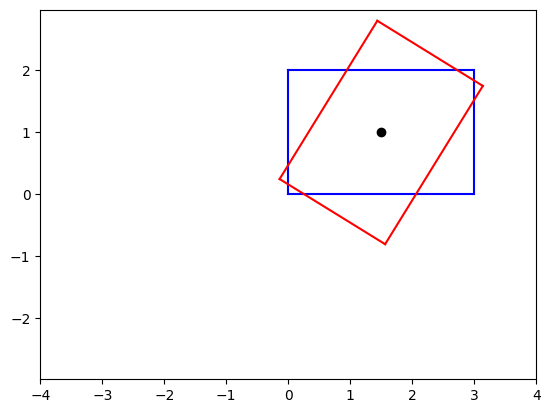

In [231]:
import numpy as np
import matplotlib.pyplot as plt

# Homogeneous Coordinates for points - [x, y, w]
def HomogeneousCoordinatesRotationExample():
    p1 = np.array([0, 0, 1])
    p2 = np.array([0, 2, 1])
    p3 = np.array([3, 2, 1])
    p4 = np.array([3, 0, 1])

    # Point to rotate around
    point = np.array([1.5, 1, 1])
    plt.plot(point[0],point[1],'ok')

    # Angle of rotation in degrees
    theta = 45

    # Translation to move point to origin
    T1 = np.array([[1, 0, -point[0]],
                  [0, 1, -point[1]],
                  [0, 0, 1]])

    # Rotation matrix
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                 [np.sin(theta), np.cos(theta), 0],
                 [0, 0, 1]])

    # Translation to move point back to original position
    T2 = np.array([[1, 0, point[0]],
                  [0, 1, point[1]],
                  [0, 0, 1]])

    # Transformation matrix
    T = T2 @ R @ T1

    # Apply transformation to rectangle points
    p1_rotated = T @ p1
    p2_rotated = T @ p2
    p3_rotated = T @ p3
    p4_rotated = T @ p4

    # Plot original rectangle
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b')
    plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'b')
    plt.plot([p3[0], p4[0]], [p3[1], p4[1]], 'b')
    plt.plot([p4[0], p1[0]], [p4[1], p1[1]], 'b')

    # Plot rotated rectangle
    plt.plot([p1_rotated[0], p2_rotated[0]], [p1_rotated[1], p2_rotated[1]], 'r')
    plt.plot([p2_rotated[0], p3_rotated[0]], [p2_rotated[1], p3_rotated[1]], 'r')
    plt.plot([p3_rotated[0], p4_rotated[0]], [p3_rotated[1], p4_rotated[1]], 'r')
    plt.plot([p4_rotated[0], p1_rotated[0]], [p4_rotated[1], p1_rotated[1]], 'r')

    # Axis settings
    plt.axis('equal')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()

HomogeneousCoordinatesRotationExample()

---
<br><h3>Minor and Cofactor Matrix</h3>

In [232]:
M = sy.Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); M
M.minor_submatrix(0, 0)
M.minor(0, 0)

⎡1  2  3⎤
⎢       ⎥
⎢4  5  6⎥
⎢       ⎥
⎣7  8  9⎦

⎡5  6⎤
⎢    ⎥
⎣8  9⎦

In [233]:
M.cofactor_matrix()
M.cofactor(0, 1)

⎡-3   6   -3⎤
⎢           ⎥
⎢6   -12  6 ⎥
⎢           ⎥
⎣-3   6   -3⎦

---
<br><h3>Eigen Vector</h3>

In [234]:
G = sy.Matrix([[1, 1], [0, 1]]); G
lamb = sy.symbols('lamda')
GLambda = G - lamb* sy.eye(2); GLambda
GLambdaDet = GLambda.det(); GLambdaDet
r = sy.solvers.solve(GLambdaDet, lamb); r
GLambda = G - r[0] * sy.eye(2); GLambda
GLambda.nullspace()

⎡1  1⎤
⎢    ⎥
⎣0  1⎦

⎡1 - λ    1  ⎤
⎢            ⎥
⎣  0    1 - λ⎦

⎡0  1⎤
⎢    ⎥
⎣0  0⎦

⎡⎡1⎤⎤
⎢⎢ ⎥⎥
⎣⎣0⎦⎦

In [235]:
G = sy.Matrix([[1, 1], [0, 1]]); G
G.eigenvals()
G.eigenvects()

⎡1  1⎤
⎢    ⎥
⎣0  1⎦

⎡⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜1, 2, ⎢⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦⎦⎠⎦

In [236]:
G = sy.Matrix([[2, 0], [0, 2]]); G
G.eigenvals()
G.eigenvects()
G2=G*G
G2.eigenvals()
Gm2=G*3
Gm2.eigenvals()

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

⎡⎛      ⎡⎡1⎤  ⎡0⎤⎤⎞⎤
⎢⎜2, 2, ⎢⎢ ⎥, ⎢ ⎥⎥⎟⎥
⎣⎝      ⎣⎣0⎦  ⎣1⎦⎦⎠⎦

In [237]:
G = sy.Matrix([[0.5, -0.6], [0.75, 1.1]]); G
G.eigenvals()
G.eigenvects()

⎡0.5   -0.6⎤
⎢          ⎥
⎣0.75  1.1 ⎦

⎡⎛                ⎡⎡ -0.596284793999944 + 0.298142396999972⋅ⅈ ⎤⎤⎞  ⎛          
⎢⎜0.8 - 0.6⋅ⅈ, 1, ⎢⎢                                          ⎥⎥⎟, ⎜0.8 + 0.6⋅
⎣⎝                ⎣⎣-8.02125543102327e-65 - 0.74535599249993⋅ⅈ⎦⎦⎠  ⎝          

      ⎡⎡  0.335410196624969 - 0.670820393249937⋅ⅈ  ⎤⎤⎞⎤
ⅈ, 1, ⎢⎢                                           ⎥⎥⎟⎥
      ⎣⎣-0.838525491562421 - 2.88483643785778e-64⋅ⅈ⎦⎦⎠⎦

---
<br><h3>Diagonalizing Matrix: $ A = PDP^-1 $</h3>

In [238]:
G = sy.Matrix([[3, 1], [0, 2]]); G
G.is_diagonalizable()
G.diagonalize()
G4=G ** 4
G4.diagonalize()

⎡3  1⎤
⎢    ⎥
⎣0  2⎦

True

⎛⎡-1  1⎤  ⎡2  0⎤⎞
⎜⎢     ⎥, ⎢    ⎥⎟
⎝⎣1   0⎦  ⎣0  3⎦⎠

⎛⎡-1  1⎤  ⎡16  0 ⎤⎞
⎜⎢     ⎥, ⎢      ⎥⎟
⎝⎣1   0⎦  ⎣0   81⎦⎠

In [239]:
G = sy.Matrix([[1, 1, 1], [2, 2, 2], [3, 0, 1]]); G
G.is_diagonalizable()
#G.diagonalize()

⎡1  1  1⎤
⎢       ⎥
⎢2  2  2⎥
⎢       ⎥
⎣3  0  1⎦

False

---
<br><h3>Inner Product</h3>

In [240]:
M = sy.Matrix([[1, 2, 3]]); M
v = sy.Matrix([1, 1, 1]); v
M.row(0).dot(v)

[1  2  3]

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

---
<br><h3>Projection</h3>

In [241]:
def Matrix_ProjVectorOnVector(vectorBase):
    if vectorBase.shape[0] == 1:
        vectorBase = vectorBase.transpose()
    elif vectorBase.shape[0] > 1 and vectorBase.shape[1] > 1:
        return "only Vector accept."
    Mat = vectorBase * vectorBase.transpose()
    Dot = vectorBase.dot(vectorBase)
    Mat = Mat / Dot
    return Mat

def ProjVectorOnVector(vectorBase, vector):
    if vector.shape[0] == 1:
        vector = vector.transpose()
    Mat = Matrix_ProjVectorOnVector(vectorBase)
    return Mat * vector

VectorBase = sy.Matrix([[1, 2, 3]]);
Vector = sy.Matrix([[1, 0, 5]]);
VectorBase, Vector
ProjVectorOnVector(VectorBase, Vector)

([1  2  3], [1  0  5])

⎡8/7 ⎤
⎢    ⎥
⎢16/7⎥
⎢    ⎥
⎣24/7⎦

In [242]:
def Matrix_ProjVectorOnMatrix(MatrixBase):
    Part1 = MatrixBase.transpose() * MatrixBase
    if Part1.det() == 0:
        return "Matrix has no inverse."
    PartInv = Part1.inv()
    Mat = MatrixBase * PartInv * MatrixBase.transpose()
    return Mat

def ProjVectorOnMatrix(MatrixBase, vector):
    if vector.shape[0] == 1:
        vector = vector.transpose()
    Mat = Matrix_ProjVectorOnMatrix(MatrixBase)
    return Mat * vector

MatrixBase = sy.Matrix([[1, 0], [1, 1], [1, 2]]);
Vector = sy.Matrix([[6, 0, 0]]);
MatrixBase, Vector
ProjVectorOnMatrix(MatrixBase, Vector)

⎛⎡1  0⎤           ⎞
⎜⎢    ⎥           ⎟
⎜⎢1  1⎥, [6  0  0]⎟
⎜⎢    ⎥           ⎟
⎝⎣1  2⎦           ⎠

⎡5 ⎤
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎣-1⎦

---
<br><h3>Orthogonal Matrix</h3>

In [243]:
def IsArthogonalMatrix(Matrix):
    Result = Matrix.transpose() * Matrix
    if Result == sy.eye(Result.rows):
        return True
    else:
        return False

Matrix = sy.Matrix([[1/sy.sqrt(5), -2/sy.sqrt(5)], [2/sy.sqrt(5), 1/sy.sqrt(5)]]); Matrix
IsArthogonalMatrix(Matrix)

⎡ √5   -2⋅√5 ⎤
⎢ ──   ──────⎥
⎢ 5      5   ⎥
⎢            ⎥
⎢2⋅√5    √5  ⎥
⎢────    ──  ⎥
⎣ 5      5   ⎦

True

---
<br><h3>Gram-Schmidt</h3>

<h6>Manual :</h6>

In [244]:
x1 = sy.Matrix([[2, 3, -3]]).transpose();
x2 = sy.Matrix([[4, 1, 0]]).transpose();
x3 = sy.Matrix([[-3, 2, 5]]).transpose();
x1, x2, x3


⎛⎡2 ⎤  ⎡4⎤  ⎡-3⎤⎞
⎜⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎟
⎜⎢3 ⎥, ⎢1⎥, ⎢2 ⎥⎟
⎜⎢  ⎥  ⎢ ⎥  ⎢  ⎥⎟
⎝⎣-3⎦  ⎣0⎦  ⎣5 ⎦⎠

In [245]:
v1 = x1;
v2 = x2 - ProjVectorOnVector(v1, x2);
v3 = x3 - ProjVectorOnVector(v1, x3) - ProjVectorOnVector(v2, x3);
v1.evalf(2),v2.evalf(2),v3.evalf(2)

⎛⎡2.0 ⎤  ⎡3.0 ⎤  ⎡-0.98⎤⎞
⎜⎢    ⎥  ⎢    ⎥  ⎢     ⎥⎟
⎜⎢3.0 ⎥, ⎢-0.5⎥, ⎢ 3.9 ⎥⎟
⎜⎢    ⎥  ⎢    ⎥  ⎢     ⎥⎟
⎝⎣-3.0⎦  ⎣1.5 ⎦  ⎣ 3.3 ⎦⎠

<h6>Sympy Library :</h6>

In [246]:
L=[x1.evalf(2),x2.evalf(2),x3.evalf(2)]
sy.GramSchmidt(L)
sy.GramSchmidt(L, True) #Normalized

⎡⎡2.0 ⎤  ⎡3.0 ⎤  ⎡-0.98⎤⎤
⎢⎢    ⎥  ⎢    ⎥  ⎢     ⎥⎥
⎢⎢3.0 ⎥, ⎢-0.5⎥, ⎢ 3.9 ⎥⎥
⎢⎢    ⎥  ⎢    ⎥  ⎢     ⎥⎥
⎣⎣-3.0⎦  ⎣1.5 ⎦  ⎣ 3.3 ⎦⎦

⎡⎡0.43 ⎤  ⎡0.88 ⎤  ⎡-0.19⎤⎤
⎢⎢     ⎥  ⎢     ⎥  ⎢     ⎥⎥
⎢⎢0.64 ⎥, ⎢-0.15⎥, ⎢0.75 ⎥⎥
⎢⎢     ⎥  ⎢     ⎥  ⎢     ⎥⎥
⎣⎣-0.64⎦  ⎣0.44 ⎦  ⎣0.63 ⎦⎦

---
<br><h3>QR Decomposition:</h3>

In [247]:
QR = sy.Matrix([[1, 0, 0], [1, 1, 0], [1, 1, 1], [1, 1, 1]]); QR
QR.QRdecomposition()

⎡1  0  0⎤
⎢       ⎥
⎢1  1  0⎥
⎢       ⎥
⎢1  1  1⎥
⎢       ⎥
⎣1  1  1⎦

⎛⎡     -√3       ⎤              ⎞
⎜⎢1/2  ────   0  ⎥              ⎟
⎜⎢      2        ⎥              ⎟
⎜⎢               ⎥  ⎡2  3/2  1 ⎤⎟
⎜⎢      √3   -√6 ⎥  ⎢          ⎥⎟
⎜⎢1/2   ──   ────⎥  ⎢   √3   √3⎥⎟
⎜⎢      6     3  ⎥  ⎢0  ──   ──⎥⎟
⎜⎢               ⎥, ⎢   2    3 ⎥⎟
⎜⎢      √3    √6 ⎥  ⎢          ⎥⎟
⎜⎢1/2   ──    ── ⎥  ⎢        √6⎥⎟
⎜⎢      6     6  ⎥  ⎢0   0   ──⎥⎟
⎜⎢               ⎥  ⎣        3 ⎦⎟
⎜⎢      √3    √6 ⎥              ⎟
⎜⎢1/2   ──    ── ⎥              ⎟
⎝⎣      6     6  ⎦              ⎠

---
<br><h3>Least Squares Problem:</h3>

<h6>Manual and Sympy Library For Independent matrix :</h6>

In [248]:
def LeastSquareProblem_IndependentCols(Matrix, Vector):
    if Vector.shape[0] == 1:
        Vector = Vector.transpose()
    Part1 = Matrix.transpose() * Matrix
    if Part1.det() == 0:
        return "Matrix has no inverse."
    PartInv = Part1.inv()
    VectorAnswer = PartInv * Matrix.transpose() * Vector
    return VectorAnswer

A = sy.Matrix([[4,0], [0,2], [1,1]]);
b = sy.Matrix([[2,0,11]]).transpose();
A,b

LeastSquareProblem_IndependentCols(A, b)

lsp = A.solve_least_squares(b); lsp

⎛⎡4  0⎤  ⎡2 ⎤⎞
⎜⎢    ⎥  ⎢  ⎥⎟
⎜⎢0  2⎥, ⎢0 ⎥⎟
⎜⎢    ⎥  ⎢  ⎥⎟
⎝⎣1  1⎦  ⎣11⎦⎠

⎡1⎤
⎢ ⎥
⎣2⎦

⎡1⎤
⎢ ⎥
⎣2⎦

<h6>Manual for dependent matrix :</h6>

In [249]:
def LeastSquareProblem_dependentCols(Matrix, Vector):
    Method_rref = (A.transpose()*A).row_join(A.transpose()*b);
    Matrix_rref = Method_rref.rref()
    NullSpace = A.nullspace(); NullSpace
    return Matrix_rref[0].col(Matrix_rref[0].shape[1] - 1),NullSpace

A,b
LeastSquareProblem_dependentCols(Matrix, Vector)

⎛⎡4  0⎤  ⎡2 ⎤⎞
⎜⎢    ⎥  ⎢  ⎥⎟
⎜⎢0  2⎥, ⎢0 ⎥⎟
⎜⎢    ⎥  ⎢  ⎥⎟
⎝⎣1  1⎦  ⎣11⎦⎠

⎛⎡1⎤    ⎞
⎜⎢ ⎥, []⎟
⎝⎣2⎦    ⎠

In [250]:
A = sy.Matrix([[1,1,0,0], [1,1,0,0], [1,0,1,0], [1,0,1,0], [1,0,0,1], [1,0,0,1]]);
b = sy.Matrix([[-3,-1,0,2,5,1]]).transpose();
A,b

LeastSquareProblem_IndependentCols(A, b)
LeastSquareProblem_dependentCols(Matrix, Vector)

⎛⎡1  1  0  0⎤  ⎡-3⎤⎞
⎜⎢          ⎥  ⎢  ⎥⎟
⎜⎢1  1  0  0⎥  ⎢-1⎥⎟
⎜⎢          ⎥  ⎢  ⎥⎟
⎜⎢1  0  1  0⎥  ⎢0 ⎥⎟
⎜⎢          ⎥, ⎢  ⎥⎟
⎜⎢1  0  1  0⎥  ⎢2 ⎥⎟
⎜⎢          ⎥  ⎢  ⎥⎟
⎜⎢1  0  0  1⎥  ⎢5 ⎥⎟
⎜⎢          ⎥  ⎢  ⎥⎟
⎝⎣1  0  0  1⎦  ⎣1 ⎦⎠

'Matrix has no inverse.'

⎛⎡3 ⎤  ⎡⎡-1⎤⎤⎞
⎜⎢  ⎥  ⎢⎢  ⎥⎥⎟
⎜⎢-5⎥  ⎢⎢1 ⎥⎥⎟
⎜⎢  ⎥, ⎢⎢  ⎥⎥⎟
⎜⎢-2⎥  ⎢⎢1 ⎥⎥⎟
⎜⎢  ⎥  ⎢⎢  ⎥⎥⎟
⎝⎣0 ⎦  ⎣⎣1 ⎦⎦⎠

---
<br><h3>Polynomial Regression:</h3>

In [251]:
h=[0,5,18,63,104,159,222,277,350,481,570,677,832]
t=[0,1,2,3,4,5,6,7,8,9,10,11,12];
t2 = []
for i in range(len(t)):
    t2.append(t[i] ** 2)

A = sy.Matrix([]);
b = sy.Matrix([]);
for i in range(len(t)):
    A = A.row_insert(i, sy.Matrix([[1, t[i], t2[i]]]));
    b = b.row_insert(i, sy.Matrix([[h[i]]]));
A,b

⎛⎡1  0    0 ⎤  ⎡ 0 ⎤⎞
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  1    1 ⎥  ⎢ 5 ⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  2    4 ⎥  ⎢18 ⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  3    9 ⎥  ⎢63 ⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  4   16 ⎥  ⎢104⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  5   25 ⎥  ⎢159⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  6   36 ⎥, ⎢222⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  7   49 ⎥  ⎢277⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  8   64 ⎥  ⎢350⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  9   81 ⎥  ⎢481⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  10  100⎥  ⎢570⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎜⎢1  11  121⎥  ⎢677⎥⎟
⎜⎢          ⎥  ⎢   ⎥⎟
⎝⎣1  12  144⎦  ⎣832⎦⎠

In [252]:
A_AT = (A.transpose()*A).inv()*A.transpose()*b;
A_AT_Float = A_AT.evalf(2)
A_AT_Float

⎡-0.22⎤
⎢     ⎥
⎢ 2.7 ⎥
⎢     ⎥
⎣ 5.5 ⎦

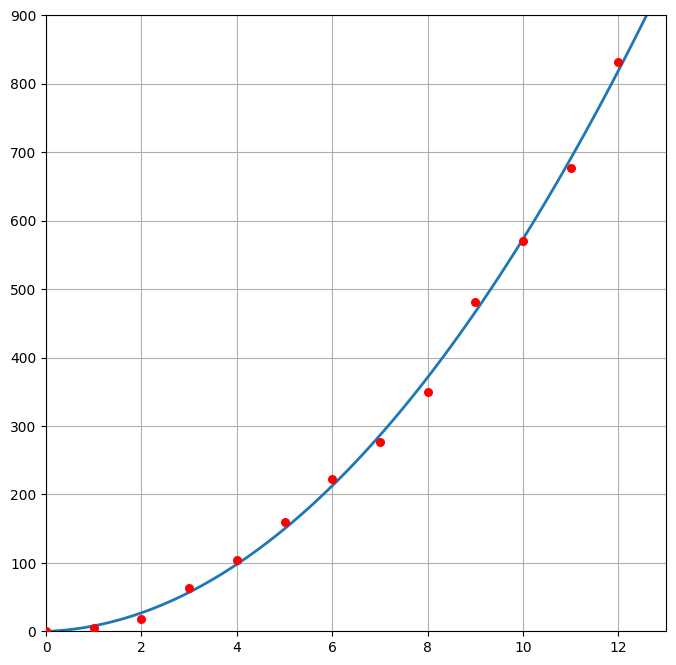

In [253]:
x = np.linspace(0, 14, 100)
y = A_AT_Float[0] + A_AT_Float[1]*x + A_AT_Float[2]*x**2

fig, ax = plt.subplots(figsize= (8, 8))
ax.plot(x, y, lw =2)
ax.set_xlim([0, 13])
ax.set_ylim([0, 900])
ax.scatter(t, h, s= 30, color = 'red', zorder = 3)
ax.grid()

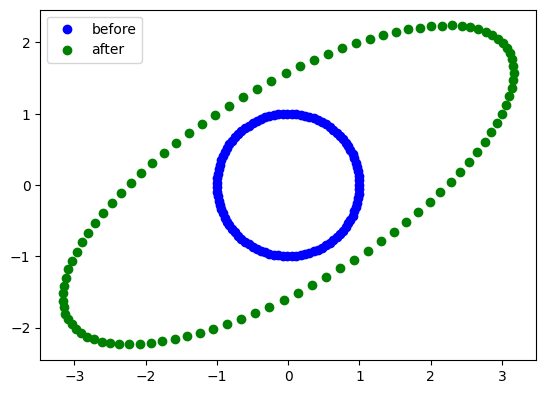

In [254]:
def PlotSpringPath(T):
    r = 1
    center = np.array([0, 0])
    angles = np.linspace(0, 2*np.pi, 100)[:-1]
    normals = np.array([np.array([np.cos(theta), np.sin(theta)]) for theta in angles])
    transported_normals = np.dot(T, normals.T).T

    fig, ax = plt.subplots()
    ax.add_artist(plt.Circle(center, r, fill=False))
    ax.scatter(normals[:, 0], normals[:, 1], c='b', marker='o', label='before')
    ax.scatter(transported_normals[:, 0], transported_normals[:, 1], c='g', marker='o', label='after')
    ax.set_aspect(1)
    ax.legend()
    plt.show()

#T = np.array([[0, 1], [-1, 0]])
T = np.array([[3, 1], [1, 2]])
#T = np.array([[0, 1], [-2, 2]])
PlotSpringPath(T)

---
<br><h3>Symmetric Matrix:</h3>

In [255]:
T=sy.Matrix([[6, -2, -1], [-2, 6, -1], [-1, -1, 5]])
T.eigenvects()
P,D = T.diagonalize(sort= True, normalize=True); P,D
P.transpose()*P
P*P.transpose()

⎡⎛      ⎡⎡1⎤⎤⎞  ⎛      ⎡⎡-1/2⎤⎤⎞  ⎛      ⎡⎡-1⎤⎤⎞⎤
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎢⎜3, 1, ⎢⎢1⎥⎥⎟, ⎜6, 1, ⎢⎢-1/2⎥⎥⎟, ⎜8, 1, ⎢⎢1 ⎥⎥⎟⎥
⎢⎜      ⎢⎢ ⎥⎥⎟  ⎜      ⎢⎢    ⎥⎥⎟  ⎜      ⎢⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣1⎦⎦⎠  ⎝      ⎣⎣ 1  ⎦⎦⎠  ⎝      ⎣⎣0 ⎦⎦⎠⎦

⎛⎡√3  -√6   -√2 ⎤           ⎞
⎜⎢──  ────  ────⎥           ⎟
⎜⎢3    6     2  ⎥           ⎟
⎜⎢              ⎥  ⎡3  0  0⎤⎟
⎜⎢√3  -√6    √2 ⎥  ⎢       ⎥⎟
⎜⎢──  ────   ── ⎥, ⎢0  6  0⎥⎟
⎜⎢3    6     2  ⎥  ⎢       ⎥⎟
⎜⎢              ⎥  ⎣0  0  8⎦⎟
⎜⎢√3   √6       ⎥           ⎟
⎜⎢──   ──    0  ⎥           ⎟
⎝⎣3    3        ⎦           ⎠

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [256]:
Mat_Orthogonal_Normal=sy.Matrix([[2/sy.sqrt(5), 1/sy.sqrt(5)], [-1/sy.sqrt(5), 2/sy.sqrt(5)]]); Mat_Orthogonal_Normal
Vector1 = sy.Matrix([[5, 6]]).transpose();
Vector2 = sy.Matrix([[1, 2]]).transpose();
Vector1, Vector1.norm(), Vector2, Vector2.norm()
NewVector1 = Mat_Orthogonal_Normal * Vector1;
NewVector2 = Mat_Orthogonal_Normal * Vector2;
NewVector1, NewVector1.norm(), NewVector2, NewVector2.norm()

⎡2⋅√5   √5 ⎤
⎢────   ── ⎥
⎢ 5     5  ⎥
⎢          ⎥
⎢-√5   2⋅√5⎥
⎢────  ────⎥
⎣ 5     5  ⎦

⎛⎡5⎤       ⎡1⎤    ⎞
⎜⎢ ⎥, √61, ⎢ ⎥, √5⎟
⎝⎣6⎦       ⎣2⎦    ⎠

⎛⎡16⋅√5⎤       ⎡4⋅√5⎤    ⎞
⎜⎢─────⎥       ⎢────⎥    ⎟
⎜⎢  5  ⎥       ⎢ 5  ⎥    ⎟
⎜⎢     ⎥, √61, ⎢    ⎥, √5⎟
⎜⎢7⋅√5 ⎥       ⎢3⋅√5⎥    ⎟
⎜⎢──── ⎥       ⎢────⎥    ⎟
⎝⎣ 5   ⎦       ⎣ 5  ⎦    ⎠

In [257]:
A=sy.Matrix([[4, 11, 14], [8, 7, -2]]); A
ATA = A.transpose() * A
if A.is_diagonalizable():
    A.diagonalize()
if ATA.is_diagonalizable():
    ATA.diagonalize()

⎡4  11  14⎤
⎢         ⎥
⎣8  7   -2⎦

⎛⎡2   -2  1⎤  ⎡0  0    0 ⎤⎞
⎜⎢         ⎥  ⎢          ⎥⎟
⎜⎢-2  -1  2⎥, ⎢0  90   0 ⎥⎟
⎜⎢         ⎥  ⎢          ⎥⎟
⎝⎣1   2   2⎦  ⎣0  0   360⎦⎠

---
<br><h3>SVD:</h3>

In [258]:
def SVD_Numpy(Matrix):
    Matrix = np.array(Matrix.tolist(), dtype=float)
    U, s, Vt = np.linalg.svd(Matrix, full_matrices=True)
    S = np.eye(Matrix.shape[0], Matrix.shape[1])
    min = np.minimum(Matrix.shape[0], Matrix.shape[1])
    for i in range(min):
        S[i,i]=s[i]
    return U, s, Vt, S

def SVD_Sympy(Matrix):
    Matrix = sy.Matrix(Matrix)
    U, S, V = Matrix.singular_value_decomposition()
    return U, S, V.transpose()

In [259]:
A=sy.Matrix([[4, 11, 14], [8, 7, -2]]); A
A.singular_values()

U, S, VT = SVD_Sympy(A)
U, S, VT

U, s, VT, S = SVD_Numpy(A)
U, s, VT, S

⎡4  11  14⎤
⎢         ⎥
⎣8  7   -2⎦

⎛⎡-√10   3⋅√10⎤                                  ⎞
⎜⎢─────  ─────⎥                                  ⎟
⎜⎢  10     10 ⎥  ⎡3⋅√10    0  ⎤  ⎡2/3  1/3  -2/3⎤⎟
⎜⎢            ⎥, ⎢            ⎥, ⎢              ⎥⎟
⎜⎢3⋅√10   √10 ⎥  ⎣  0    6⋅√10⎦  ⎣1/3  2/3  2/3 ⎦⎟
⎜⎢─────   ─── ⎥                                  ⎟
⎝⎣  10     10 ⎦                                  ⎠

(array([[-0.949, -0.316],
        [-0.316,  0.949]]),
 array([18.974,  9.487]),
 array([[-0.333, -0.667, -0.667],
        [ 0.667,  0.333, -0.667],
        [-0.667,  0.667, -0.333]]),
 array([[18.974,  0.   ,  0.   ],
        [ 0.   ,  9.487,  0.   ]]))

In [260]:
A=sy.Matrix([[1, -1], [-2, 2], [2, -2]]); A
A.singular_values()

U, S, VT = SVD_Sympy(A)
U, S, VT

U, s, VT, S = SVD_Numpy(A)
U, s, VT, S

⎡1   -1⎤
⎢      ⎥
⎢-2  2 ⎥
⎢      ⎥
⎣2   -2⎦

⎛⎡-1/3⎤                    ⎞
⎜⎢    ⎥          ⎡-√2   √2⎤⎟
⎜⎢2/3 ⎥, [3⋅√2], ⎢────  ──⎥⎟
⎜⎢    ⎥          ⎣ 2    2 ⎦⎟
⎝⎣-2/3⎦                    ⎠

(array([[-0.333,  0.667, -0.667],
        [ 0.667,  0.667,  0.333],
        [-0.667,  0.333,  0.667]]),
 array([4.243, 0.   ]),
 array([[-0.707,  0.707],
        [ 0.707,  0.707]]),
 array([[4.243, 0.   ],
        [0.   , 0.   ],
        [0.   , 0.   ]]))

In [261]:
A=sy.Matrix([[4, 4, 4, 4], [3, 3, 3, 3]]); A
A.singular_values()

U, S, VT = SVD_Sympy(A)
U, S, VT

U, s, VT, S = SVD_Numpy(A)
U, s, VT, S

⎡4  4  4  4⎤
⎢          ⎥
⎣3  3  3  3⎦

⎛⎡4/5⎤                            ⎞
⎜⎢   ⎥, [10], [1/2  1/2  1/2  1/2]⎟
⎝⎣3/5⎦                            ⎠

(array([[-0.8, -0.6],
        [-0.6,  0.8]]),
 array([10.,  0.]),
 array([[-0.5  , -0.5  , -0.5  , -0.5  ],
        [-0.5  ,  0.833, -0.167, -0.167],
        [-0.5  , -0.167,  0.833, -0.167],
        [-0.5  , -0.167, -0.167,  0.833]]),
 array([[10.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]))

---
<br><h3>Compress Image by SVD :</h3>

(1000, 1500)
(1000, 1500)
(1000, 1500)
original size:
1000000
compressed size:
250000
original size / Ratio compressed size:
4.113996
Compressed image size is 411.4% of the original image 
DONE - Compressed the image! Over and out!


<Figure size 2000x2000 with 0 Axes>

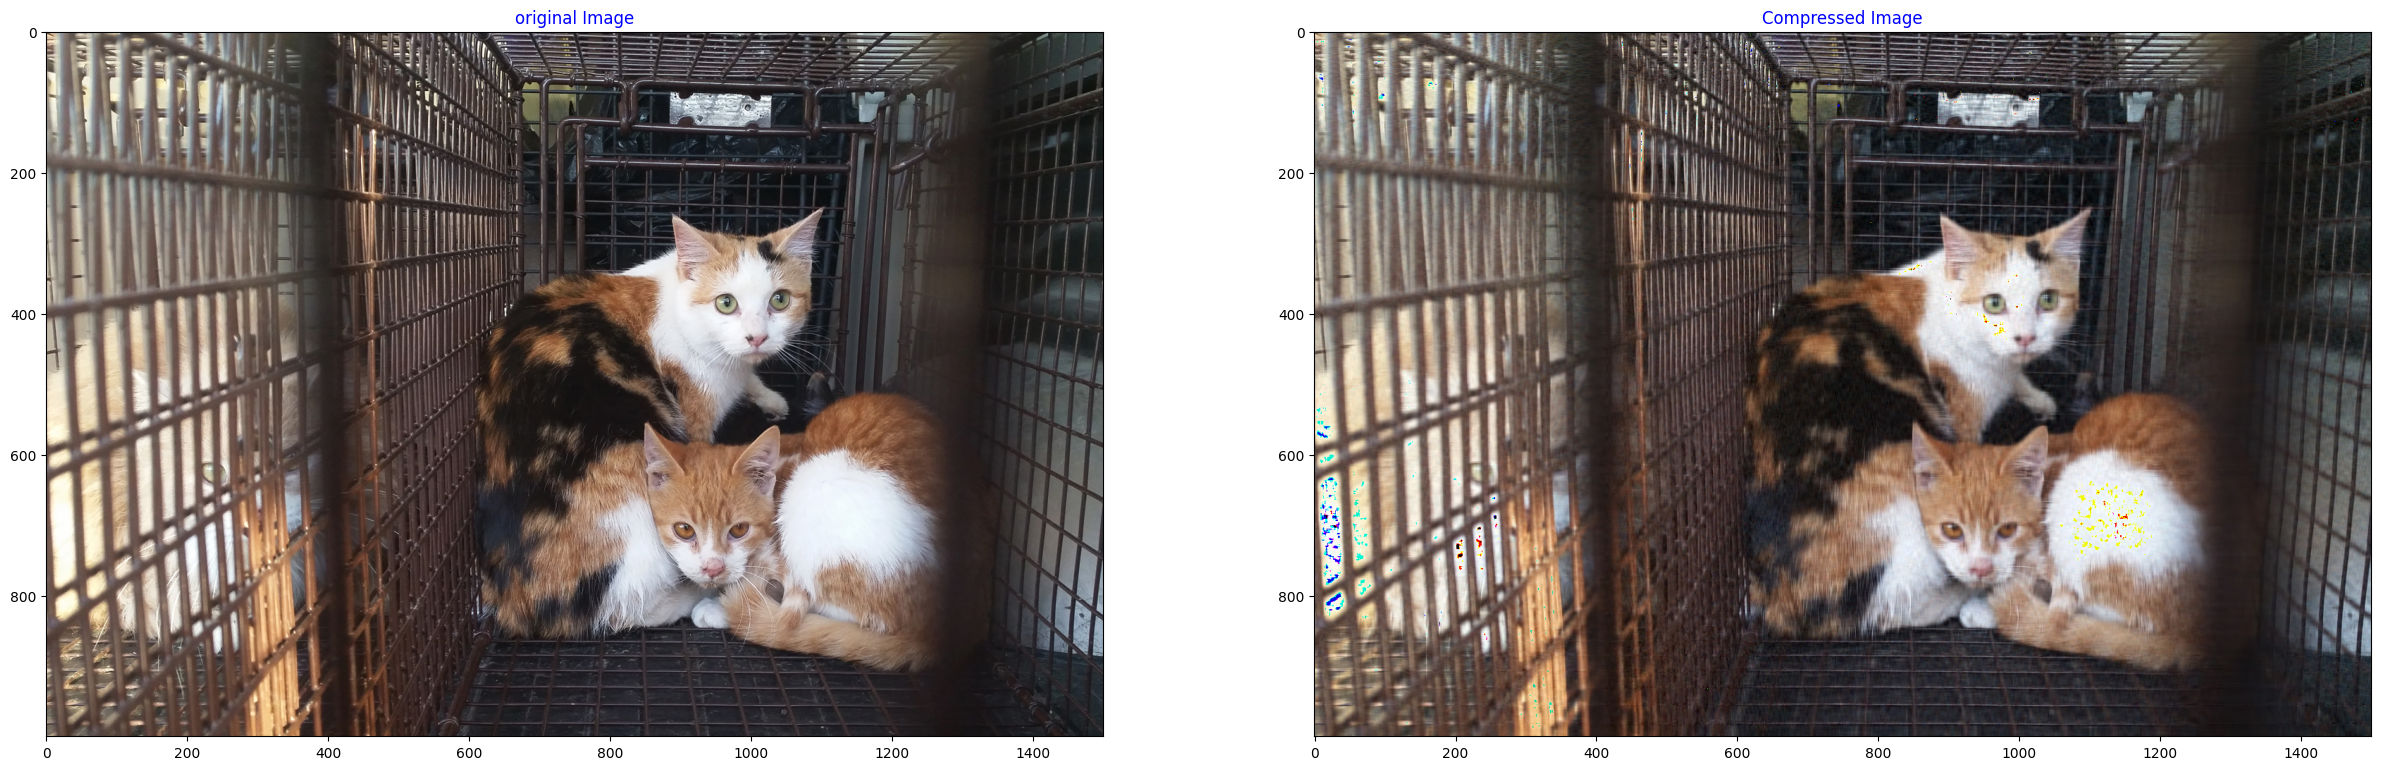

In [517]:
def openImage(imagePath):
    imOrig = Image.open(imagePath)
    im = np.array(imOrig)
    aRed = im[:, :, 0]
    aGreen = im[:, :, 1]
    aBlue = im[:, :, 2]
    return [aRed, aGreen, aBlue, imOrig]

def compressSingleChannel(channelDataMatrix, singularValuesLimit):
    # print(np.linalg.matrix_rank(channelDataMatrix))
    U, s, VT, S = SVD_Numpy(channelDataMatrix)
    k = singularValuesLimit
    U_K = U[:, 0:k]
    s_K = np.diag(s)[0:k, 0:k]
    VT_K = VT[0:k, :]
    aChannelCompressedInner = U_K @ s_K @ VT_K
    print(aChannelCompressedInner.shape)
    aChannelCompressed = aChannelCompressedInner.astype('uint8')
    return aChannelCompressed

def CompressImageBySvd(ImageAddress, singularValuesLimit, SaveNewImage=False):
    aRed, aGreen, aBlue, originalImage = openImage(ImageAddress)

    aRedCompressed = compressSingleChannel(aRed, singularValuesLimit)
    aGreenCompressed = compressSingleChannel(aGreen, singularValuesLimit)
    aBlueCompressed = compressSingleChannel(aBlue, singularValuesLimit)

    imr = Image.fromarray(aRedCompressed, mode=None)
    img = Image.fromarray(aGreenCompressed, mode=None)
    imb = Image.fromarray(aBlueCompressed, mode=None)

    newImage = Image.merge("RGB", (imr, img, imb))

    newImagePath = ImageAddress + '_k' + str(singularValuesLimit) + '.jpg'
    if SaveNewImage: newImage.save(newImagePath)

    Orginal_Size = os.path.getsize(ImageAddress)

    if SaveNewImage: Compressed_Size = os.path.getsize(newImagePath);
    else: Compressed_Size = (newImage.size[0] + newImage.size[1]) * 100;

    print('original size:')
    print(originalImage.size[1] * 1000)
    print('compressed size:')
    print(Compressed_Size)
    print('original size / Ratio compressed size:')
    ratio = Orginal_Size / Compressed_Size * 1.0
    print(ratio)
    print('Compressed image size is ' + str(round(ratio * 100, 2)) + '% of the original image ')
    print('DONE - Compressed the image! Over and out!')

    plt.figure(figsize = (20, 20))
    f, axarr = plt.subplots(1,2, figsize=(30, 30))
    axarr[0].imshow(originalImage)
    axarr[0].set_title('original Image', color='b')
    axarr[1].imshow(newImage)
    axarr[1].set_title('Compressed Image', color='b')

imageAddress = './Pics/cat2.jpg'
singularValuesLimit = 100
CompressImageBySvd(imageAddress, singularValuesLimit)

---
<br><h3>PCA :</h3>

In [263]:
a = np.random.randn(3, 1000)
WHO = np.array([[10, 2, 1], [2, 5, 1], [1, 1, 3]])
WHO = (WHO @ a) + np.array([[160], [70], [30]])
WHO

array([[153.815, 168.894, 149.688, ..., 160.398, 156.358, 161.563],
       [ 74.65 ,  75.723,  66.347, ...,  71.015,  75.187,  77.212],
       [ 29.379,  37.05 ,  29.619, ...,  29.235,  30.906,  32.984]])

In [264]:
def Plot3Dmatrix(Matrix, Title, n1, n2, Matrix2=None):
    fig = plt.figure(figsize = (5, 9))
    ax = fig.add_subplot(projection='3d')

    xs = Matrix[0]
    ys = Matrix[1]
    zs = Matrix[2]
    ax.scatter3D(xs, ys, zs, color = "green", s=3)

    if Matrix2 is not None:
        xs2 = Matrix2[0]
        ys2 = Matrix2[1]
        zs2 = Matrix2[2]
        ax.scatter3D(xs2, ys2, zs2, color = "red", s=3)

    ax.set_xlabel('Height')
    ax.set_ylabel('Weight')
    ax.set_zlabel('Old')

    ax.view_init(n1, n2)
    plt.title(Title)
    plt.show()

<h5>PCA with SVD :</h5><br>
$ EigenVector(A^T*A) = sigma^2 = EigenVector(A*A^T) $
<br>
$ U = A*V / Sigma $


Input Matrix: (3, 1000)
[[153.815 168.894 149.688 ... 160.398 156.358 161.563]
 [ 74.65   75.723  66.347 ...  71.015  75.187  77.212]
 [ 29.379  37.05   29.619 ...  29.235  30.906  32.984]]


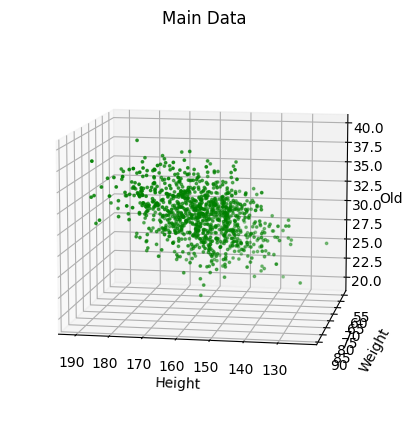


Zero-Mean Matrix: (3, 1000)
[[ -6.192   8.886 -10.32  ...   0.391  -3.649   1.555]
 [  4.675   5.748  -3.628 ...   1.04    5.212   7.237]
 [ -0.608   7.063  -0.368 ...  -0.752   0.92    2.997]]


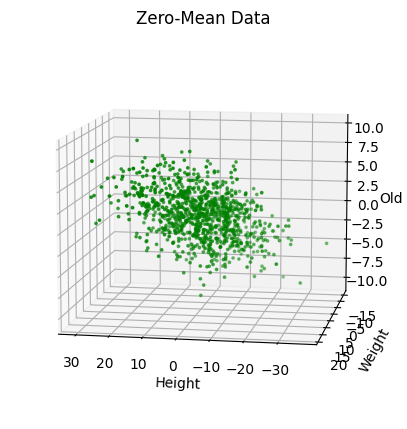


Eigen Vectors V: (1000, 1000)
[[ 0.013 -0.034  0.032 ... -0.002  0.004 -0.013]
 [-0.044 -0.028 -0.004 ... -0.004 -0.044 -0.047]
 [-0.025  0.054  0.015 ... -0.013 -0.011  0.003]
 ...
 [ 0.    -0.006  0.013 ...  1.    -0.    -0.   ]
 [-0.015 -0.042  0.004 ... -0.     0.998 -0.002]
 [ 0.002 -0.048 -0.009 ... -0.    -0.002  0.998]]

Eigen Values  S: (3, 3)
[[334.52    0.      0.   ]
 [  0.    141.619   0.   ]
 [  0.      0.     81.347]]

U: (3, 3)
[[334.52    0.      0.   ]
 [  0.    141.619   0.   ]
 [  0.      0.     81.347]]

2 Principal Components matrix: (3, 1000)
[[ -6.243   8.993 -10.291 ...   0.365  -3.671   1.561]
 [  3.95    7.285  -3.212 ...   0.661   4.902   7.316]
 [  1.321   2.971  -1.475 ...   0.258   1.745   2.789]]

Test 2 Principal Components error: 
8.474584265757139


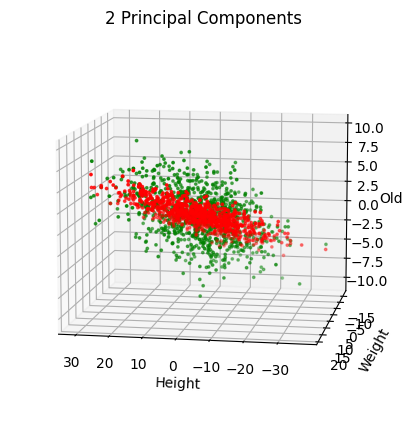

(array([[ -6.243,   8.993, -10.291, ...,   0.365,  -3.671,   1.561],
        [  3.95 ,   7.285,  -3.212, ...,   0.661,   4.902,   7.316],
        [  1.321,   2.971,  -1.475, ...,   0.258,   1.745,   2.789]]),
 8.474584265757139)

In [265]:
def PCA_With_SVD(Matrix, nComponent, IsLog=False, IsPlot=False):
    if np.linalg.det(Matrix@Matrix.T) == 0: print("!!! Matrix is singular. !!!"); return;

    if IsLog: print("\nInput Matrix: " + str(Matrix.shape)); print(Matrix);
    if IsPlot: Plot3Dmatrix(WHO, "Main Data", 10, 100)

    row_means = np.mean(Matrix, axis=1)
    Ah = Matrix - row_means.reshape(-1, 1)
    if IsLog: print("\nZero-Mean Matrix: " + str(Ah.shape)); print(Ah);
    if IsPlot: Plot3Dmatrix(Ah, "Zero-Mean Data", 10, 100)

    U, S, VT = np.linalg.svd(Ah)
    S = np.diag(S)
    if IsLog: print("\nEigen Vectors V: " + str(VT.shape)); print(VT);
    if IsLog: print("\nEigen Values  S: " + str(S.shape)); print(S);
    if IsLog: print("\nU: " + str(U.shape)); print(S);

    k = nComponent;
    Ah_k = (U[:, 0:k] @ S[0:k, 0:k] @ VT[0:k, :])
    error = np.max(np.abs(Ah.T - Ah_k.T))
    if IsLog: print("\n" + str(k) + " Principal Components matrix: " + str(Ah_k.shape)); print(Ah_k);
    if IsLog: print("\nTest " + str(k) + " Principal Components error: "); print(error);
    Plot3Dmatrix(Ah, str(k) + " Principal Components", 10, 100, Ah_k)

    return Ah_k, error

PCA_With_SVD(WHO, 2, True, True)


Input Matrix: (1000, 3)
[[149.53   62.657  29.834]
 [174.777  69.331  30.127]
 [171.241  69.003  31.099]
 ...
 [143.541  65.136  25.791]
 [174.693  76.845  33.994]
 [170.571  75.368  33.154]]


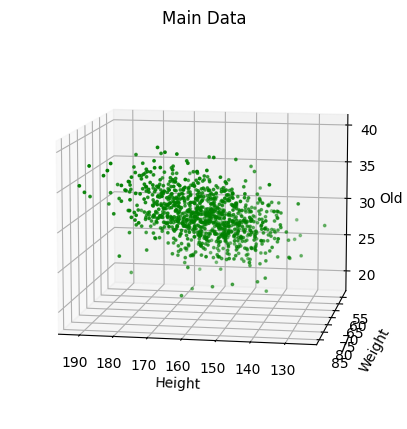


Zero-Mean Matrix: (3, 1000)
[[ -9.968  15.279  11.743 ... -15.957  15.195  11.073]
 [ -7.142  -0.468  -0.796 ...  -4.663   7.046   5.569]
 [ -0.137   0.156   1.127 ...  -4.181   4.022   3.182]]


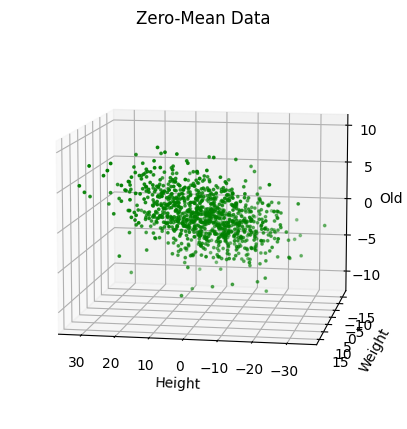


Covariance Of Main Data (A*AT):
[[104136.699  29700.709  13236.325]
 [ 29700.709  31423.992  10650.5  ]
 [ 13236.325  10650.5    10656.214]]

Eigen Vectors V(A*AT): (3, 3)
[[ 0.928  0.371 -0.011]
 [ 0.34  -0.861 -0.378]
 [ 0.149 -0.347  0.926]]

Eigen Values  S(A*AT): (3, 3)
[[342.273   0.      0.   ]
 [  0.    151.353   0.   ]
 [  0.      0.     78.476]]

U (A*AT): (1000, 3)
[[-0.034  0.016  0.034]
 [ 0.041  0.04   0.002]
 [ 0.032  0.031  0.016]
 ...
 [-0.05  -0.003 -0.025]
 [ 0.05  -0.012  0.011]
 [ 0.037 -0.012  0.009]]

SVD Check: 1.0658141036401503e-14
[[ -9.968  15.279  11.743 ... -15.957  15.195  11.073]
 [ -7.142  -0.468  -0.796 ...  -4.663   7.046   5.569]
 [ -0.137   0.156   1.127 ...  -4.181   4.022   3.182]]

New Uncorrelated matrix: (3, 1000)
[[-11.705  14.049  10.8   ... -17.026  17.105  12.65 ]
 [  2.495   6.024   4.656 ...  -0.46   -1.82   -1.787]
 [  2.677   0.16    1.221 ...  -1.941   0.901   0.725]]

Covariance of New Uncorrelated matrix: (3, 3)
[[117150.843     -0.

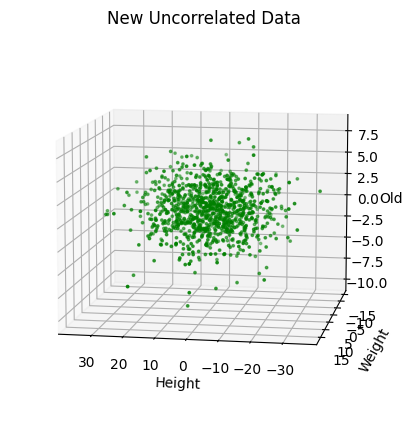


2 Principal Components matrix: (3, 1000)
[[-10.018  15.093  11.611 ... -15.963  15.261  11.137]
 [ -6.496   0.031   0.002 ...  -5.928   7.921   6.238]
 [ -0.82   -2.424  -1.873 ...   0.353   0.508   0.542]]

Test 2 Principal Components error: 
9.31497259112442


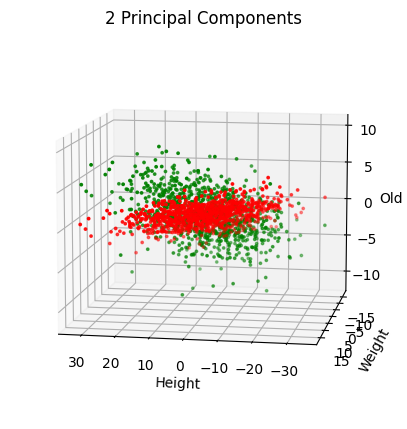

(array([[-10.018,  -6.496,  -0.82 ],
        [ 15.093,   0.031,  -2.424],
        [ 11.611,   0.002,  -1.873],
        ...,
        [-15.963,  -5.928,   0.353],
        [ 15.261,   7.921,   0.508],
        [ 11.137,   6.238,   0.542]]),
 9.31497259112442,
 array([[-11.705,  14.049,  10.8  , ..., -17.026,  17.105,  12.65 ],
        [  2.495,   6.024,   4.656, ...,  -0.46 ,  -1.82 ,  -1.787],
        [  2.677,   0.16 ,   1.221, ...,  -1.941,   0.901,   0.725]]))

In [489]:
def PCA_With_Covariance_Manual(Matrix, nComponent, IsLog=True, IsPlot=True):
    if IsLog: print("\nInput Matrix: " + str(Matrix.shape)); print(Matrix);
    rows, cols = Matrix.shape

    # PCA Manual Implement -> Horizontal MAtrix
    if cols < rows:
        Matrix = Matrix.T

    if IsPlot: Plot3Dmatrix(Matrix, "Main Data", 10, 100)

    if np.linalg.det(Matrix@Matrix.T) == 0: print("!!! Matrix is singular. !!!"); return;

    row_means = np.mean(Matrix, axis=1)
    Ah = Matrix - row_means.reshape(-1, 1)
    if IsLog: print("\nZero-Mean Matrix: " + str(Ah.shape)); print(Ah);
    if IsPlot: Plot3Dmatrix(Ah, "Zero-Mean Data", 10, 100)

    C = Ah @ Ah.T
    if IsLog: print("\nCovariance Of Main Data (A*AT):"); print(C);

    S_AAT, V = np.linalg.eig(C)
    S = np.sqrt(S_AAT)
    S = np.diag(S)
    if IsLog: print("\nEigen Vectors V(A*AT): " + str(V.shape)); print(V);
    if IsLog: print("\nEigen Values  S(A*AT): " + str(S.shape)); print(S);

    U3 = Ah.T @ V @ np.linalg.inv(S)
    if IsLog: print("\nU (A*AT): " + str(U3.shape)); print(U3);

    Ahh = V @ S @ U3.T
    if IsLog: print("\nSVD Check: " + str(np.max(np.abs(Ah.T - Ahh.T)))); print(Ahh);

    B = V.T @ Ah
    Ch = B @ B.T
    if IsLog: print("\nNew Uncorrelated matrix: " + str(B.shape)); print(B);
    if IsLog: print("\nCovariance of New Uncorrelated matrix: " + str(Ch.shape)); print(Ch);
    if IsPlot: Plot3Dmatrix(B, "New Uncorrelated Data", 10, 100)

    k = nComponent;
    Ah_k = (U3[:, 0:k] @ S[0:k, 0:k] @ V[0:k, :]).T
    error = np.max(np.abs(Ah.T - Ah_k.T))
    if IsLog: print("\n" + str(k) + " Principal Components matrix: " + str(Ah_k.shape)); print(Ah_k);
    if IsLog: print("\nTest " + str(k) + " Principal Components error: "); print(error);
    if IsPlot: Plot3Dmatrix(Ah, str(k) + " Principal Components", 10, 100, Ah_k)

    if cols < rows:
        return Ah_k.T, error, B
    return Ah_k, error, B

PCA_With_Covariance_Manual(WHO, 2, True, True)


Input Matrix: (3, 1000)
[[150.85  160.119 174.347 ... 171.091 160.285 146.902]
 [ 72.553  57.998  77.35  ...  70.841  66.518  64.33 ]
 [ 28.323  27.33   33.141 ...  31.91   33.325  27.87 ]]
PCA sklearn: (2, 1000) [[-8.123 -4.544 16.061  7.42  -0.46  -5.822 -6.028 -0.984 11.43  -5.142]
 [-5.163 11.26  -2.267 -1.771  4.023 -3.465  8.963 -2.54   0.295  3.37 ]]  ...
Padding-Zero PCA sklearn:  [[ -8.123  -4.544  16.061 ...  10.663  -0.623 -14.624]
 [ -5.163  11.26   -2.267 ...   2.611   1.955   0.705]
 [  0.      0.      0.    ...   0.      0.      0.   ]]


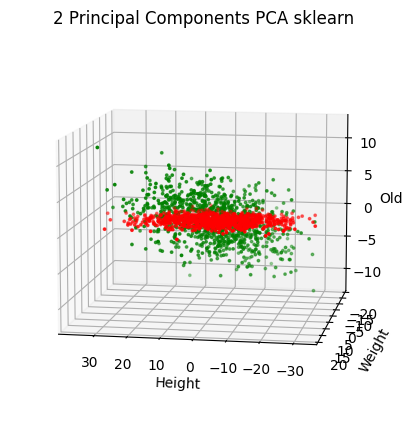

(array([[ -8.123,  -5.163],
        [ -4.544,  11.26 ],
        [ 16.061,  -2.267],
        ...,
        [ 10.663,   2.611],
        [ -0.623,   1.955],
        [-14.624,   0.705]]),
 array([[ -8.123,  -5.163,   0.   ],
        [ -4.544,  11.26 ,   0.   ],
        [ 16.061,  -2.267,   0.   ],
        ...,
        [ 10.663,   2.611,   0.   ],
        [ -0.623,   1.955,   0.   ],
        [-14.624,   0.705,   0.   ]]),
 31.5799959971892)

In [545]:
def PCA_With_Covariance_Sklearn(Matrix, nComponent, IsLog=True, IsPlot=True):
    if IsLog: print("\nInput Matrix: " + str(Matrix.shape)); print(Matrix);
    rows, cols = Matrix.shape

    # PCA Manual Implement -> Horizontal MAtrix
    if cols < rows:
        Matrix = Matrix.T

    row_means = np.mean(Matrix, axis=1)
    Ah = Matrix - row_means.reshape(-1, 1)

    k = nComponent
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(Matrix.T)
    print("PCA sklearn: " + str(X_pca.T.shape), X_pca.T[0:10, 0:10], " ...")

    rows, cols = Matrix.shape
    dif = rows - nComponent

    MatTemp = X_pca
    if dif > 0:
        for i in range(dif):
            zero_row = np.zeros((1, X_pca.T.shape[1]))
            Padd_X_pca = np.vstack((X_pca.T, zero_row))
            X_pca = Padd_X_pca.T
    else:
        Padd_X_pca = X_pca.T
    print("Padding-Zero PCA sklearn: ", Padd_X_pca)

    Plot3Dmatrix(Ah, str(k) + " Principal Components PCA sklearn", 10, 100, Padd_X_pca)

    error = np.max(np.abs(Ah.T - Padd_X_pca.T))

    if cols < rows:
        return MatTemp.T, Padd_X_pca, error
    return MatTemp, Padd_X_pca.T, error


PCA_With_Covariance_Sklearn(WHO, 2, True, True)

<h1>Eigen Faces :</h1><br>

Face image shape: (112, 92)
Number of classes: 40
Number of pictures: 400


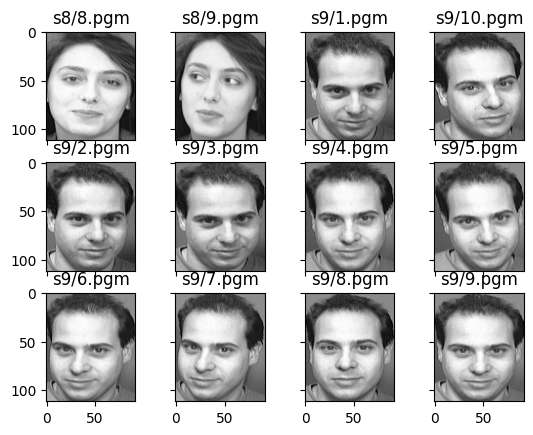

face matrix Shape:  (389, 10304)
variance_ratio Example 0...40:  [0.178 0.129 0.067 0.056 0.051 0.034 0.025 0.023 0.02  0.018 0.015 0.014
 0.011 0.011 0.01  0.009 0.009 0.008 0.007 0.007 0.007 0.006 0.006 0.005
 0.005 0.005 0.005 0.005 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004
 0.003 0.003 0.003 0.003]
PCA Components Number:  (389, 10304)
eigenfaces with 50 Components Number:  (50, 10304)


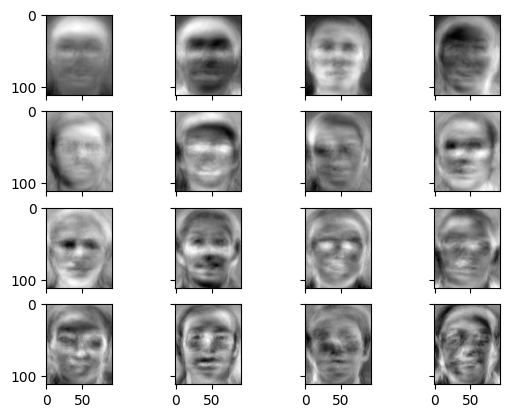

weights length:  389
Weight example 0...2 [[1511.4853501679424, -1232.8611070347922, 1769.978651160209, 482.7969677863002, -609.0805289754093, 84.79141353722125, -505.48597341400483, 441.6357480619977, 175.41450412161512, -1031.6179125526696, -292.6679939508103, -149.35632272651196, 203.10995982047015, 294.2980368896839, -171.91539160757543, -53.76965449304831, -403.6330635119284, -549.3216418802218, 234.28918396415378, 284.8132430772639, 263.5322654825642, -86.89465127284303, 472.7060699663882, 366.42075060560734, 128.8513217039668, 105.66620774109845, -39.70596555579369, -312.097720159134, -336.1182603999373, 101.45803636896152, 88.03838633499734, 130.4419679995149, 40.02692620403175, -85.40801170776845, -153.76252648892455, 456.58908320395494, -131.44218501035402, -122.56083082934998, 60.329324449174976, -487.9291319175077, -84.61698084021262, -460.91464624036144, -264.88845973990885, -144.45537131269927, -42.7949784025486, -33.93662988109375, 368.42241883011866, -251.57321530184444

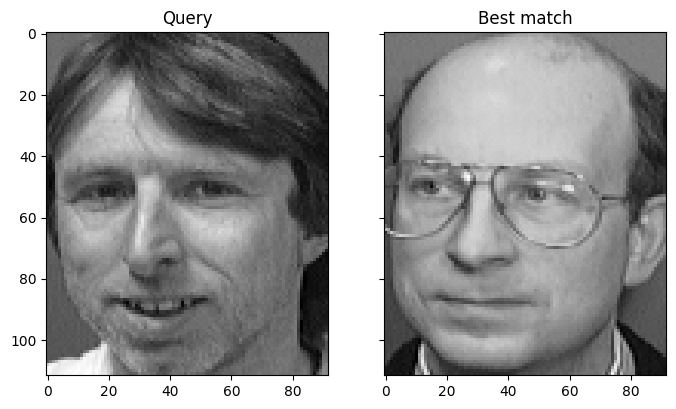

In [524]:
def EigenFaces(ZipDatasetPgmPath, n_components, NShowInputDataset, NShowPcaOutput):
    faces = {}
    with zipfile.ZipFile(ZipDatasetPgmPath) as facezip:
        for filename in facezip.namelist():
            if not filename.endswith(".pgm"): continue;
            with facezip.open(filename) as image:
                faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

    facesKeys = list(faces.keys())
    facesValues = list(faces.values())

    faceshape = facesValues[0].shape
    print("Face image shape:", faceshape)
    classes = set(filename.split("/")[0] for filename in faces.keys())
    print("Number of classes:", len(classes))
    print("Number of pictures:", len(faces))

    if NShowInputDataset > 0:
        FigSize = int(NShowInputDataset/4)
        if int(NShowInputDataset%4) != 0: FigSize = FigSize + 1
        fig, axes = plt.subplots(FigSize,4,sharex=True,sharey=True)
        faceimages = facesValues[-NShowInputDataset:]
        faceNames = facesKeys[-NShowInputDataset:]
        for i in range(NShowInputDataset):
            axes[i//4][i%4].set_title(faceNames[i])
            axes[i//4][i%4].imshow(faceimages[i], cmap="gray")
        plt.show()

    facematrix = []
    facelabel = []
    for key,val in faces.items():
        if key.startswith("s40/"):
            continue # this is our test set
        if key == "s39/10.pgm":
            continue # this is our test set
        facematrix.append(val.flatten())
        facelabel.append(key.split("/")[0])

    # Create facematrix as (n_samples,n_pixels) matrix
    facematrix = np.array(facematrix)
    print("face matrix Shape: ", facematrix.shape)

    pca = PCA().fit(facematrix)
    print("variance_ratio Example 0...40: ", pca.explained_variance_ratio_[0: 40])

    PcaComponents = pca.components_
    print("PCA Components Number: ", PcaComponents.shape)
    eigenfaces = PcaComponents[:n_components]
    print("eigenfaces with " + str(n_components) + " Components Number: ", eigenfaces.shape)

    if NShowPcaOutput > 0:
        FigSize = int(NShowPcaOutput/4)
        if int(NShowPcaOutput%4) != 0: FigSize = FigSize + 1
        fig, axes = plt.subplots(FigSize,4,sharex=True,sharey=True)
        for i in range(NShowPcaOutput):
            axes[i//4][i%4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
        plt.show()

    # Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
    # weights = eigenfaces @ (facematrix - pca.mean_).T
    weights = []
    for i in range(facematrix.shape[0]):
        weight = []
        for j in range(n_components):
            w = eigenfaces[j] @ (facematrix[i] - pca.mean_)
            weight.append(w)
        weights.append(weight)

    print("weights length: ", len(weights))
    print("Weight example 0...2", weights[0:2])

    # Test on out-of-sample image of existing class
    query = faces["s39/10.pgm"].reshape(1,-1)
    print(query.shape)
    query_weight = eigenfaces @ (query - pca.mean_).T
    print(query_weight.shape)
    euclidean_distance = np.linalg.norm(weights - query_weight.T, axis=0)
    print(euclidean_distance)

    best_match = np.argmin(euclidean_distance)
    print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))

    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()

EigenFaces("./Pics/attface.zip", 50, 12, 16)

In [557]:
a = np.array([[4, 11, 14], [8, 7, -2]])
U, S, V = np.linalg.svd(a)
U, S, V
U @ np.diag(S) @ V[0:2, :]

a.T
U, S, V = np.linalg.svd(a.T)
U, S, V
U[:,0:2] @ np.diag(S) @ V[:, :]



(array([[-0.949, -0.316],
        [-0.316,  0.949]]),
 array([18.974,  9.487]),
 array([[-0.333, -0.667, -0.667],
        [ 0.667,  0.333, -0.667],
        [-0.667,  0.667, -0.333]]))

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

array([[ 4,  8],
       [11,  7],
       [14, -2]])

(array([[-0.333, -0.667, -0.667],
        [-0.667, -0.333,  0.667],
        [-0.667,  0.667, -0.333]]),
 array([18.974,  9.487]),
 array([[-0.949, -0.316],
        [ 0.316, -0.949]]))

array([[ 4.,  8.],
       [11.,  7.],
       [14., -2.]])